In [21]:
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scanpy as sc
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy as sp
from sklearn.cluster import KMeans
import matplotlib as mpl

In [22]:
figpath = '/stanley/WangLab/kamal/figures/projects/spin/reviews/brain/graphst/'
os.makedirs(figpath, exist_ok=True)
dpi = 300

In [23]:
basepath = '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/'
n_sample_rates = 11
single_cell_results = '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/knn/reconstructions_0.0_50physical_15latent'

In [24]:
k_physical = 50
k_latent = 15

# Load results

In [25]:
param_sets = glob(os.path.join(basepath, f'*{k_physical}physical_{k_latent}latent*'))
param_sets.sort()
param_sets[0] = single_cell_results
n_params = len(param_sets)
recons = np.zeros((n_params,n_sample_rates))
kmeans_ari = np.zeros((n_params,n_sample_rates))
leiden_ari = np.zeros((n_params,n_sample_rates))

for i in range(n_params):
    outputs = glob(os.path.join(basepath,param_sets[i])+'/*.txt')

    for j in range(len(outputs)):
        split = outputs[j].split('.txt')[0].split('/')[-1].split('_')
        recons[i,j] = float(split[1])
        kmeans_ari[i,j] = float(split[2])
        leiden_ari[i,j] = float(split[3])

In [26]:
param_sets

['/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/knn/reconstructions_0.0_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.1_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.2_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.3_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.4_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.5_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.6_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_0.7_50physical_15latent',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/re

In [27]:
recons = np.ma.masked_equal(recons,0)
kmeans_ari = np.ma.masked_equal(kmeans_ari,0)
leiden_ari = np.ma.masked_equal(leiden_ari,0)

In [28]:
# Multiply by ratio of n_nbrs to normalize to [0,1]
recons *= k_physical/k_latent

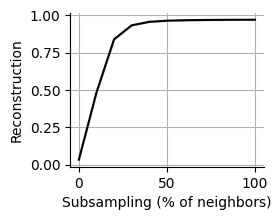

In [9]:
x = np.arange(n_params) * 10
plt.figure(figsize=(2.5,2))

# K-means
std = recons.std(axis=1)
mean = recons.mean(axis=1)
plt.plot(x, mean, color='k')
plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.2)

plt.ylabel('Reconstruction')
plt.xlabel('Subsampling (% of neighbors)')
plt.gca().spines[['top','right']].set_visible(False)
tick_coords = np.arange(0,101,50)
tick_labels = tick_coords
plt.xticks(tick_coords, tick_labels)
# plt.xticks(x,x)
plt.grid()

filename = 'recon_curve.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)
plt.show()

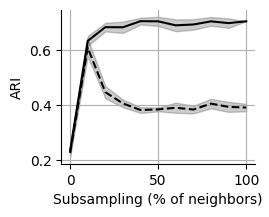

In [31]:
x = np.arange(n_params) * 10
plt.figure(figsize=(2.5,2))

# K-means
std = kmeans_ari.std(axis=1)
mean = kmeans_ari.mean(axis=1)
plt.plot(x, mean, color='k', label='K-means')
plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.2)

# Leiden
std = leiden_ari.std(axis=1)
mean = leiden_ari.mean(axis=1)
plt.plot(x, mean, color='k', label='Leiden', linestyle="--")
plt.fill_between(x, mean-std, mean+std, color='k', alpha=0.2)

plt.ylabel('ARI')
plt.xlabel('Subsampling (% of neighbors)')
# plt.legend(bbox_to_anchor=(-0.14,1.1))
plt.gca().spines[['top','right']].set_visible(False)
tick_coords = np.arange(0,101,50)
tick_labels = tick_coords
plt.xticks(tick_coords, tick_labels)
# plt.xticks(x,x)
plt.grid()

filename = 'ari_vs_subsampling.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)
plt.show()

In [12]:
# for i in range(n_sample_rates):

#     try:
#         path = glob(f'{param_sets[i]}/*.h5ad')[0]
    #     print('='*20)
    #     print(path)
    #     adata = sc.read_h5ad(path)

    #     sc.set_figure_params(figsize=(5,5))
    #     sc.pl.embedding(adata, basis='spatial', color='region_true', s=20, palette=sc.pl.palettes.default_102)
    #     sc.pl.embedding(adata, basis='spatial', color='leiden', s=20, palette=sc.pl.palettes.default_102)

    # except:
    #     print(f'No AnnData saved for {param_sets[i]}')

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


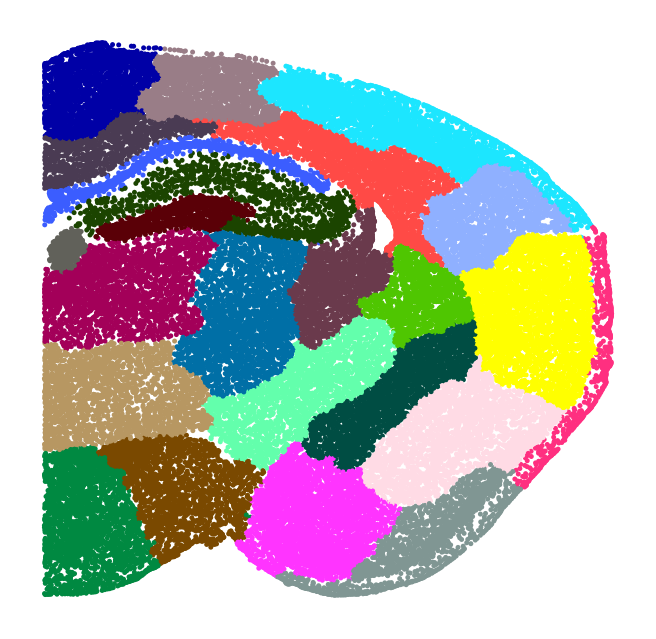

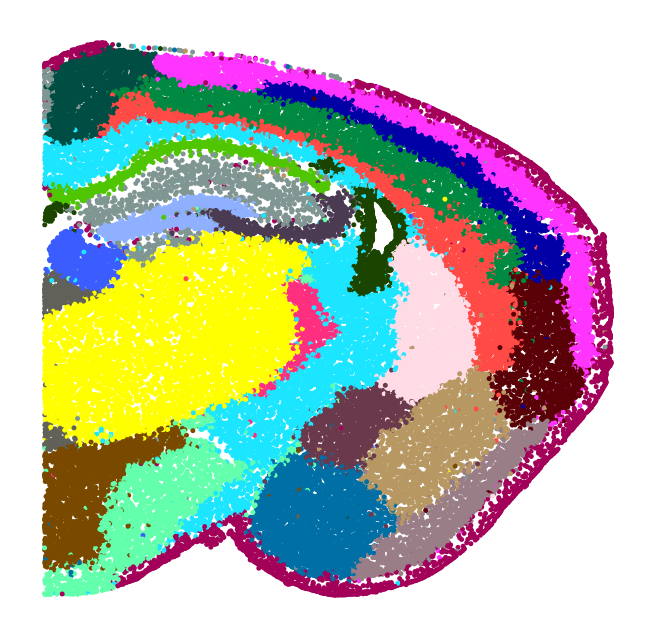

In [13]:
good_sample_rates = [1.0, 0.1]

for sample_rate in good_sample_rates:
    
    path = f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_{sample_rate}_{k_physical}physical_{k_latent}latent/adata_{sample_rate}.h5ad'
    adata = sc.read_h5ad(path)

    sc.set_figure_params(figsize=(5,5))
    sc.pl.embedding(adata, basis='spatial', color='leiden', s=20, frameon=False, legend_loc=False, title='',
    return_fig=True, palette=sc.pl.palettes.default_102)

    filename = f'leiden_{sample_rate}.png'
    filepath = os.path.join(figpath,filename)
    plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

# UMAP

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/umap/distances.py:

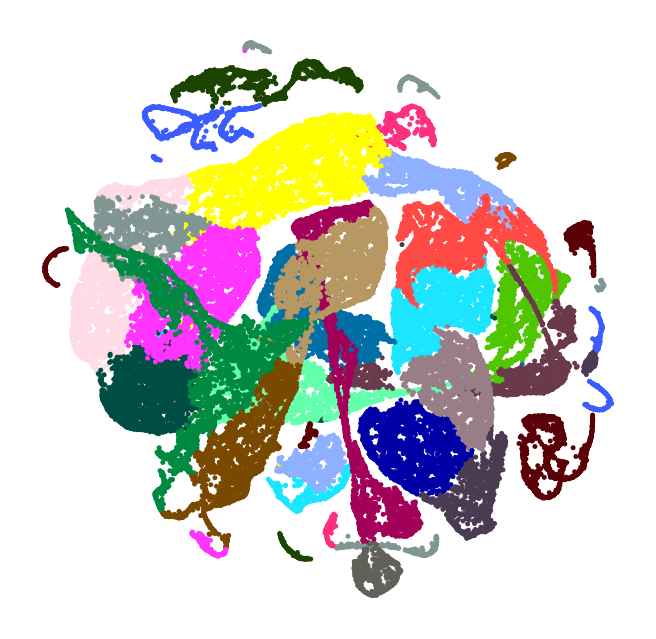

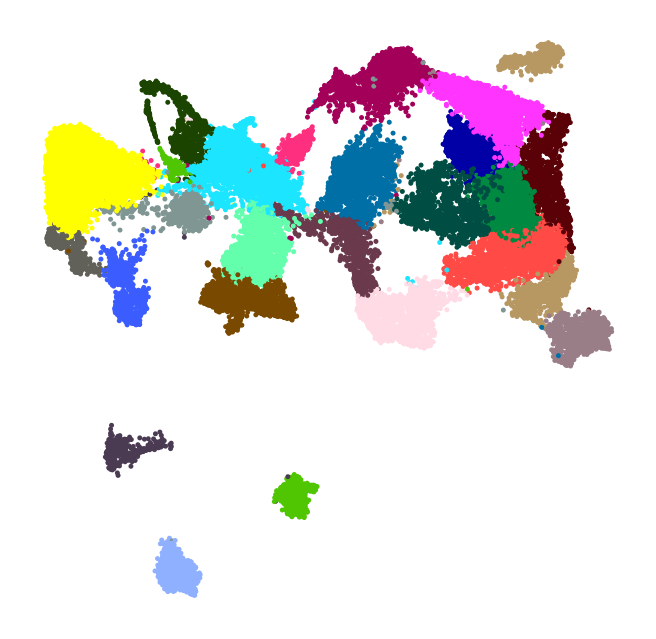

In [11]:
good_sample_rates = [1.0, 0.1]

for sample_rate in good_sample_rates:
    
    path = f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_{sample_rate}_{k_physical}physical_{k_latent}latent/adata_{sample_rate}.h5ad'
    adata = sc.read_h5ad(path)

    sc.tl.umap(adata, neighbors_key='smoothed')

    sc.set_figure_params(figsize=(5,5))
    sc.pl.embedding(adata, basis='X_umap', color='leiden', s=20, frameon=False, legend_loc=False, title='',
    return_fig=True, palette=sc.pl.palettes.default_102)

    filename = f'umap_{sample_rate}.png'
    filepath = os.path.join(figpath,filename)
    plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

    adata.write(path[:-5]+'_umap.h5ad')

# Annotation

## Load

In [5]:
sample_rate = 0.1
path = f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/reconstructions_{sample_rate}_{k_physical}physical_{k_latent}latent/adata_{sample_rate}_umap.h5ad'
adata = sc.read_h5ad(path)

## Assign labels

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


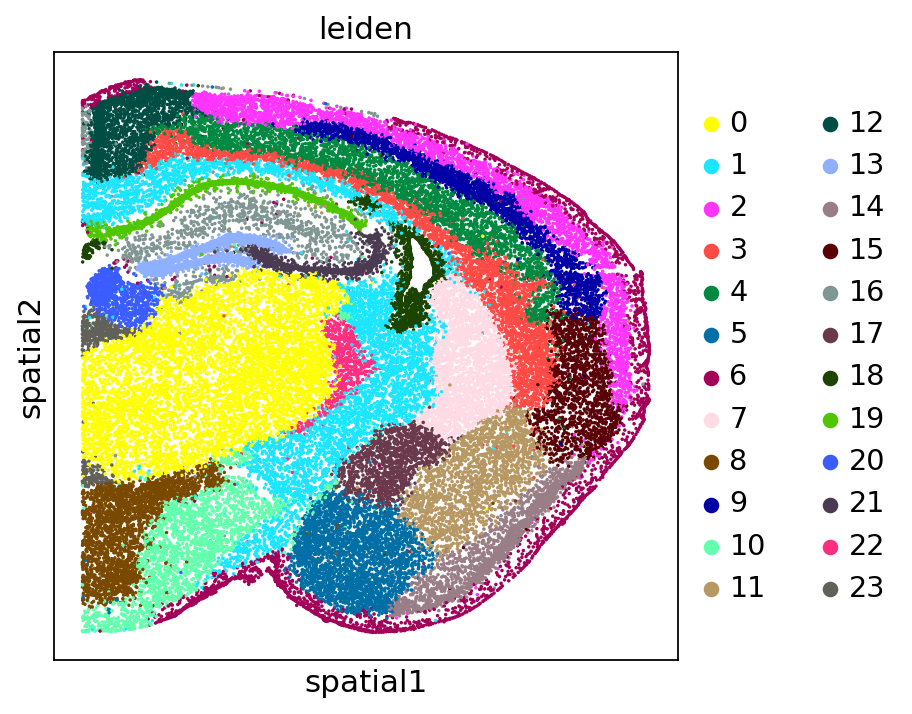

In [6]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='leiden', s=10)

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


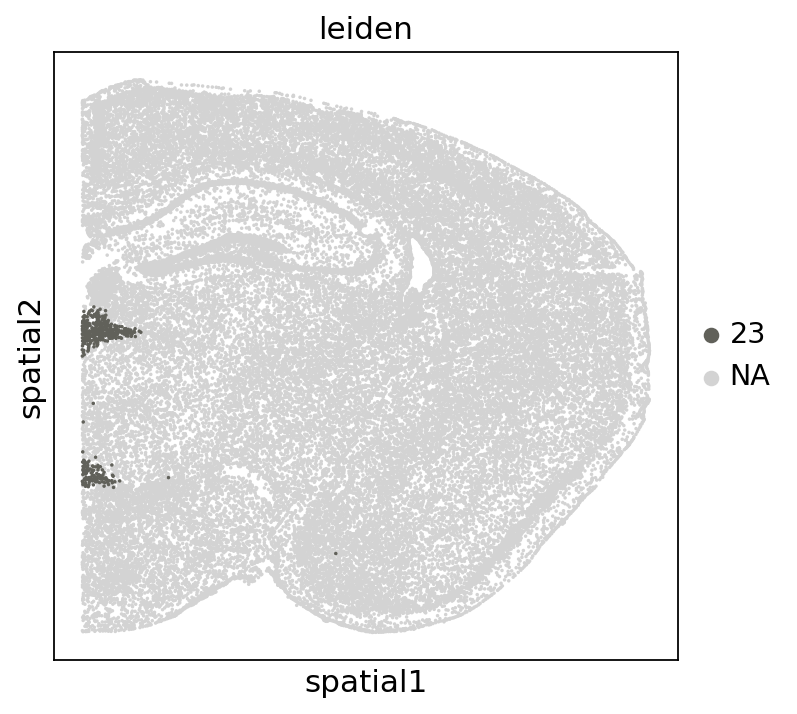

In [31]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='leiden', s=10, groups='23')

In [32]:
leiden2region = {
    '0': 'TH1',
    '1': 'fiber tract',
    '2': 'L2/3',
    '3': 'L6',
    '4': 'L5',
    '5': 'COA',
    '6': 'meninges/L1',
    '7': 'CP',
    '8': 'HY1',
    '9': 'L4',
    '10': 'HY2',
    '11': 'BLA',
    '12': 'RSP',
    '13': 'DG',
    '14': 'PIR',
    '15': 'CTX_idk',
    '16': 'HPFmo',
    '17': 'MEA',
    '18': 'VL',
    '19': 'CA1',
    '20': 'Hb',
    '21': 'CA2/3',
    '22': 'RT',
    '23': 'TH2',
}
adata.obs['region'] = adata.obs['leiden'].map(leiden2region)

## Recolor

### Transfer colors from preprint

In [33]:
olddata = sc.read_h5ad('/stanley/WangLab/kamal/code/remote_notebooks/spatial_autocorrelation/adata_all_techniques.h5ad')
old_regions = olddata.obs['region_smooth_subsampled'].unique()
palette = sc.pl.palettes.default_102
old_cmap = {old_regions[i]:palette[i] for i in range(len(old_regions))}

In [34]:
old_regions = set(old_regions)
new_regions = set(adata.obs['region'].unique())
shared_regions = old_regions.intersection(new_regions)
all_regions = old_regions.union(new_regions)

new_cmap = dict()
for region in shared_regions:
    new_cmap[region] = old_cmap[region]

print(new_regions-shared_regions)
print(old_regions-shared_regions)

{'TH1', 'CTX_idk', 'Hb', 'HY2', 'COA', 'TH2', 'MEA', 'HY1'}
{'HY', 'chpl2', 'LHb', 'TH', 'MEA/COA', 'MHb', 'chpl1'}


In [37]:
new_cmap['HY2'] = old_cmap['HY']
new_cmap['MEA'] = old_cmap['chpl2']
new_cmap['Hb'] = old_cmap['LHb']
new_cmap['TH1'] = old_cmap['TH']
new_cmap['COA'] = old_cmap['MEA/COA']
new_cmap['HY1'] = old_cmap['MHb']
new_cmap['TH2'] = old_cmap['chpl1']
new_cmap['CTX_idk'] = sc.pl.palettes.default_102[24]

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


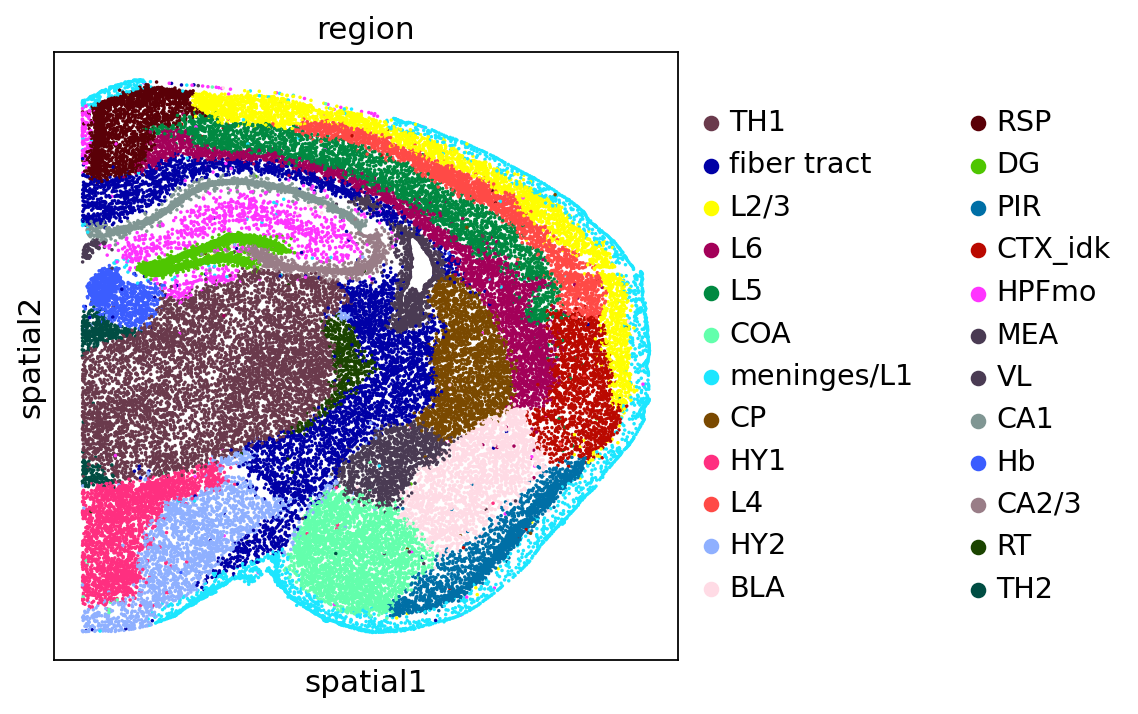

In [38]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='region', palette=new_cmap, s=10)

### Tissue

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


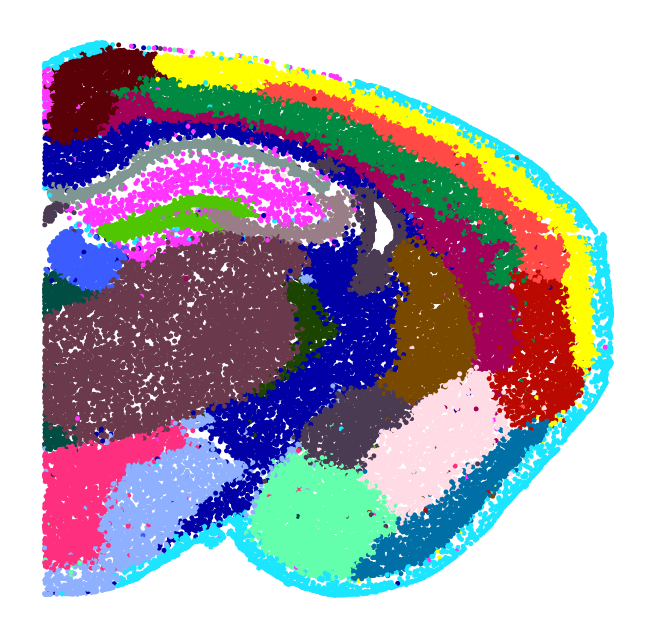

In [39]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='spatial', color='region', s=20, frameon=False, legend_loc=False, title='',
return_fig=True, palette=new_cmap)

filename = f'leiden_{sample_rate}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

### UMAP

/stanley/WangLab/kamal/envs/xax/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


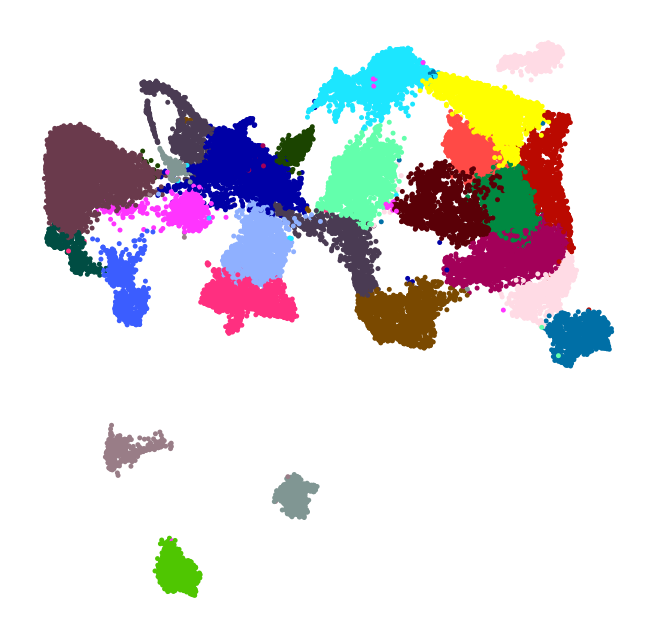

In [40]:
sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=20, frameon=False, legend_loc=False, title='',
return_fig=True, palette=new_cmap)

filename = f'umap_{sample_rate}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

## Save

In [ ]:
adata.write(path[:-5]+'_annotated.h5ad')